# 3. 앙상블 모형
- 앙상블: '전체적 조화', '모두 함께' 등의 의미로, 공통의 목표를 가진 객체가 많이 모여 함께 일하는 것
- 정확도가 낮은 모델을 여러 개 조합하는 방식이 하나의 좋은 모형보다 오히려 좋은 성능을 가질 수 있다는 가정하에 만들어진 기법이다.
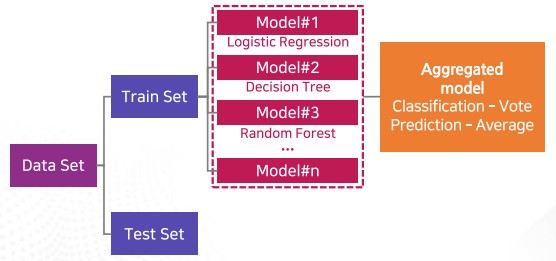
- 0.XXX~50% 매우 낮은 성공 확률을 가진 것을 성공시키는 확률을 구할 때 많이 사용한다.  
ex) 패트리엇 미사일: 50%의 성공 확률을 가지고 있는 반대편에서 날아오는 미사일을 어떻게 방어할까? 미사일을 많이 날릴 수록 방어 확률이 증가한다!
- 앙상블 기법의 장점:  
① 과적합(Overfitting) 개선: 각 모델별로 발생하는 편향을 종합하여 예측 =  과적합 발생 확률 감소  
② 예측 정확도 향상: 다양한 모델의 결과를 종합혀여 예측 결과 생성 -> 예측 정확도 증가 
- 앙상블 기법의 한계: 물리적 능력 등 한계가 있기 때문에 분석에 쓰이는 데이터나 모델이 현실을 100% 반영하기 어렵다.

## Bagging & Boosting
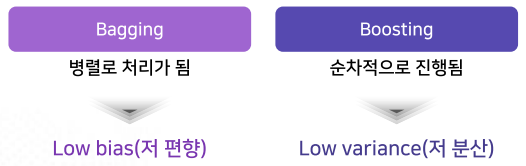
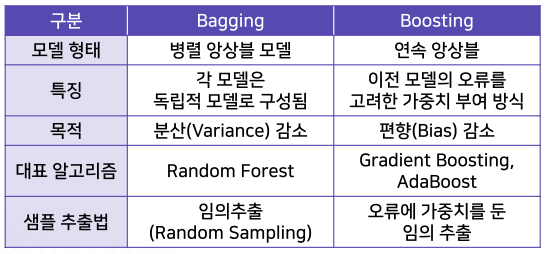
- 분산(Variance) & 편향(Bias)운 서로 Trade-off의 관계를 가진다.
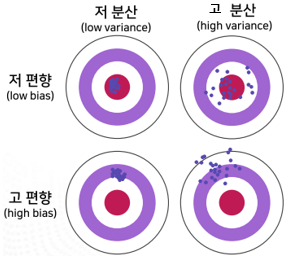
: 저분산 = 정밀도 높음 / 저편향 =  정확도 높음
- Bagging과 Boosting 모델들
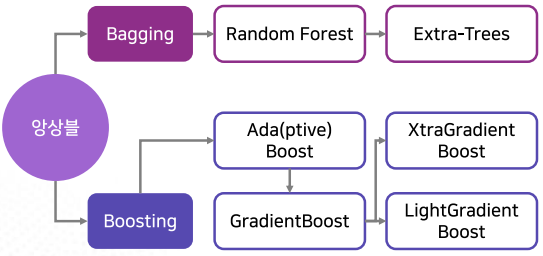

1. Bagging = Bootstrapping(복원추출) + Aggregation(병합)
- 샘플을 복원 추출하여 여러 개의 학습 데이터셋을 만들고, 만들어진 학습 데이터를 모델에 적용시킨 후 예측된 여러 결과값들을 집계하여 최종 결과 값을 산출하는 방식이다.
- 즉, 분류 모델에서 투표 방식을 통해 최종 모델과 결과 값을 선출한다.
- 독립적인 샘플을 추출해서 학습하는 방식이다.
- Bagging Model 원리: 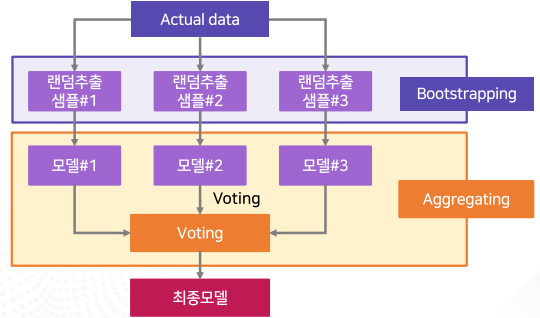
- Bagging Model 종류:  
① Random Forest
  - Bagging의 가장 대표적인 모델
  - 나무를 모아 숲을 이룬 것과 같은 형태로, 다수의 의사결정나무를 취하는 Bagging 앙상블 모형
  - Random Forest의 장/단점:
  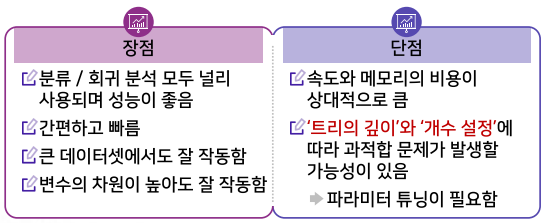
  - 파라미터 설정:
  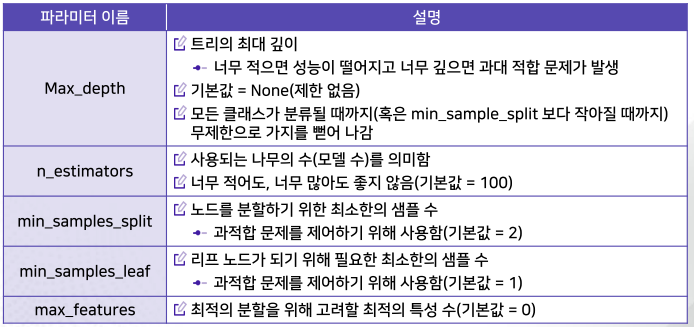
  
2. Boosting
- 약한 학습기 여러 개를 순차적으로 학습-예측하면서 '오차가 발생하는 샘플들에게 가충치를 부여'하여 다시 샘플을 추출하여 학습하는 방식 = 오차 중심 학습
- 특징
  - 오차를 중심으로 학습하다보니 정확도가 꽤 높음
  - 오차를 집중 공략하다 보니 이상치나 노이즈에 약하고 편향(Bias)이 발생하기 쉬움
  - 과적합 문제에 더 취약함
- Boosting Model 원리: 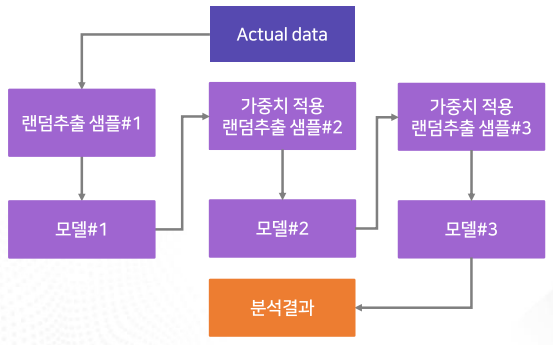
- Boosting Model 종류:  
① AdaBoost (Adaptive Boost)
  - 약한 의사결정 나무의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘
  - 속도나 성능적인 측면에서 약한 의사결정나무를 학습기로 사용한다.  
  
  ② GradientBoost:
  - AdaBoost와 유사하나 가중치를 업데이트하기 위해 경사 하강법(Gradient Descent)를 이용한다.
  - GradientBoost의 장/단점:
  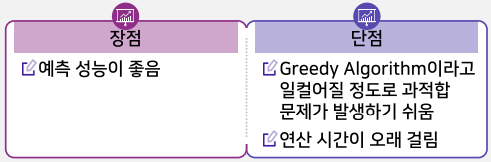
  - GradientBoost_Tree 파라미터: 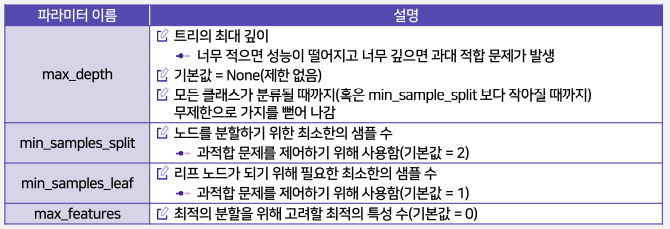
  - GradientBoost_Boost 파라미터: 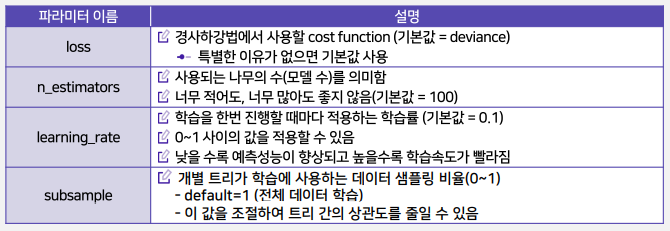

  ③ XtraGradientBoost
  - 랜덤 포레스트 모델과 함께 가장 많이 사용된다.
  - 트리 기반 알고리즘 중 가장 각광 받는다.
  - GBM을 기반으로 확장된 개념의 알고리즘이다.
  - GBM의 단점(느린 계산, 과적합 규제)를 해결했다.
  - XtraGradientBoost의 장/단점: 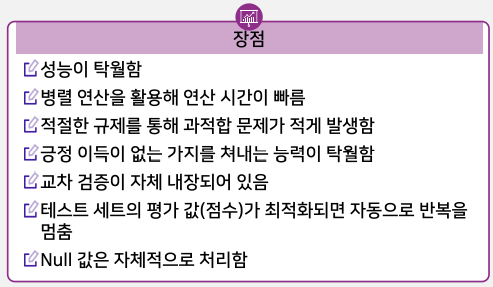
  - XtraGradientBoost 파라미터:
  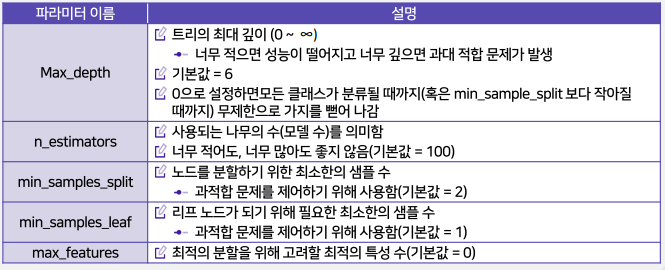
  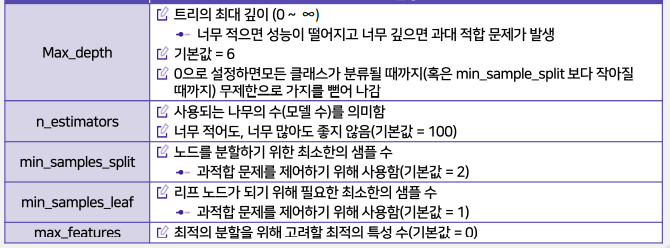
  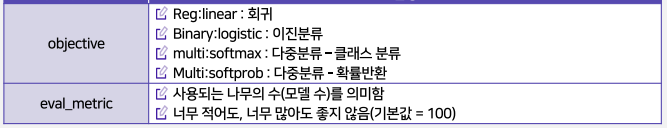
  - XtraGradientBoost 과적합 문제를 해결하기 위한 파라미터 설정:
  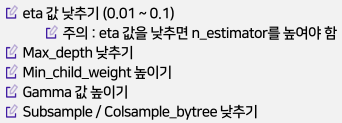

## 3-1. 분류 분리

In [1]:
# sklearn의 데이터셋에서 Breast Cancer 데이터를 불러오기
from sklearn.datasets import load_breast_cancer
# load_breast_cancer() 함수를 통해 Breast Cancer 데이터를 불러온다
breast_cancer_data = load_breast_cancer()

# sklearn 모듈의 model_selection 패키지에서 train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split
# 데이터를 train_set와 test_set으로 나누어 준다
X_train, X_test, y_train, y_test= train_test_split(
    breast_cancer_data.data,
    breast_cancer_data.target,
    test_size=0.2,
    random_state=10)

In [2]:
# 의사결정 나무
# Sklearn 패키지에서 Tree 분류기를 불러오자
from sklearn.tree import DecisionTreeClassifier

# Step 2에서 분리한 훈련 데이터로 모델을 학습시키자
tree_clf = DecisionTreeClassifier(max_depth=None)
tree_clf.fit(X_train,y_train)

# 의사결정나무의 분석결과를 살펴본다
print("훈련 데이터 점수:", round(tree_clf.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(tree_clf.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.912


In [9]:
# Bagging Model: Random Forest
# Sklearn 패키지에서 랜덤포레스트 분류기를 불러오자
from sklearn.ensemble import RandomForestClassifier

# Step 2 에서 분리한 훈련 데이터로 모델을 학습시키자
RFC = RandomForestClassifier(max_depth=None)
RFC.fit(X_train,y_train)

# 랜덤포레스트의 분석결과를 살펴본다
print("훈련 데이터 점수:", round(RFC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(RFC.score(X_test, y_test), 3))

# 테스트 데이터 점수가 증가한 것을 볼 수 있다.

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.982


Feature importance: 
 mean fractal dimension    0.003170
symmetry error            0.003427
concave points error      0.003438
mean symmetry             0.003560
concavity error           0.003688
dtype: float64



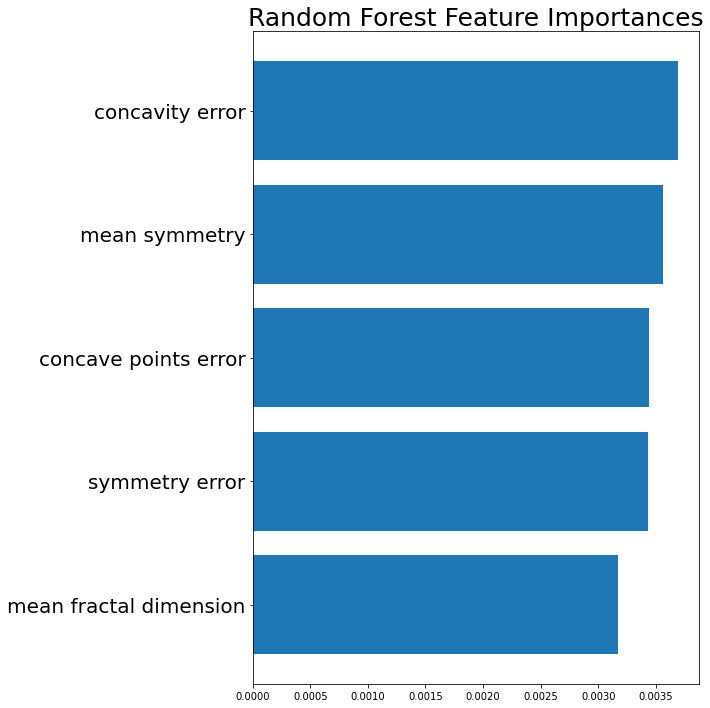

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
# %matplotlib inline: Notebook을 실행한 브라우저에 바로 그림(표)를 띄울 것을 지시
# 주의: 바로 옆에 주석을 달면 해당 주석이 출력된다

#랜덤포레스트의 특성 중요도를 feature_importance_values에 담는다
feature_importance_values = RFC.feature_importances_ # 특성 중요도

# feature_importance_values 를 시리즈데이터로 올린다
feature_importance = pd.Series(feature_importance_values, 
                               index=breast_cancer_data.feature_names)
# pd.Series(values_인자,index='index_인자') -> index는 왼쪽 values는 오른쪽에 배치

# feature_importance를 내림차순정렬하여 가장중요한 변수 5개를 추출한다
FI_top5 = feature_importance.sort_values(ascending=True)[:5]
# 변수.sort_values(): DataFrame 정렬하기
# ascending=True: 내림차순 정렬/ ascending=False: 오름차순 정렬
# [:n]: n개의 변수를 추출한다 # [a:b]: index a부터 b-1까지 추출한다

print("Feature importance: \n",FI_top5)
print()
plt.figure(figsize=(8,12)) # 그래프 크기: plt.figure(figsize=(가로,세로))
plt.title('Random Forest Feature Importances', fontsize=25)
plt.barh(np.arange(len(FI_top5)), FI_top5.values, align="center") # 그래프 가로 정렬: plt.barh(np.arange(n개),DataFrame,align='위치')
# 보통 아무 설정이 없으면 그래프 그릴 때 index가 x축, value가 y축으로 정렬
plt.yticks(np.arange(len(FI_top5)), FI_top5.index, fontsize=20)
plt.show();

In [5]:
# Boosting Model: Gradient Boost
# Sklearn 패키지에서 GradientBoosting 분류기를 불러오자
from sklearn.ensemble import GradientBoostingClassifier

# Step 2 에서 분리한 훈련 데이터로 모델을 학습시키자
GBC = GradientBoostingClassifier(max_depth=None)
GBC.fit(X_train,y_train)

# GradientBoosting 모델의 분석결과를 살펴본다
print("훈련 데이터 점수:", round(GBC.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(GBC.score(X_test, y_test), 3))

훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.912


In [11]:
# Boosting Model: Xtra Gradient Boost
# xgboost 패키지에서 XGBClassifier 분류기를 불러오자
from xgboost import XGBClassifier

# Step 2 에서 분리한 훈련 데이터로 모델을 학습시키자
XGB = XGBClassifier(max_depth= 100, n_estimators= 100)
XGB.fit(X_train,y_train)

# 의사결정나무의 분석결과를 살펴본다
print("훈련 데이터 점수:", round(XGB.score(X_train, y_train), 3))
print("테스트 데이터 점수:", round(XGB.score(X_test, y_test), 3))

[15:26:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
훈련 데이터 점수: 1.0
테스트 데이터 점수: 0.974


c:\users\administrator\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

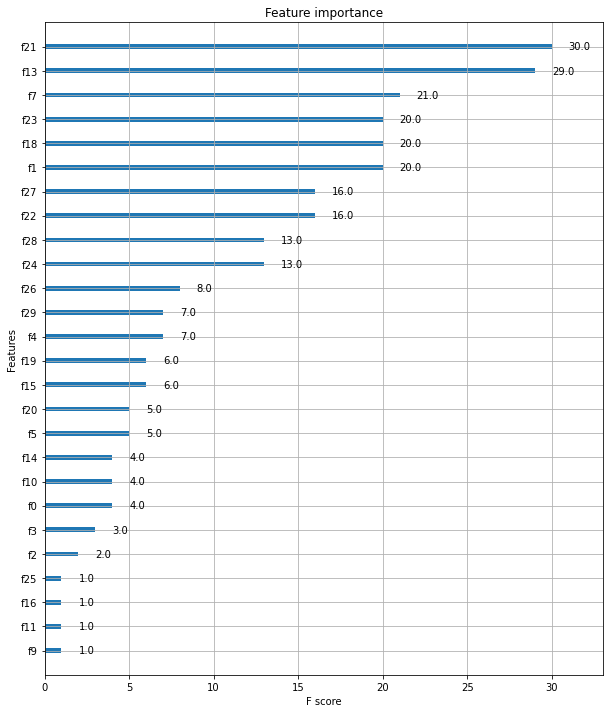

In [12]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12)) # 하나의 ax(사용할 공간)를 갖는 하나의 figure(새로운 종이) 생성 # figsize=(가로,세로)

plot_importance(XGB, ax=ax)
# plot_importance(): 결과 산출시 사용된 요소들의 중요도 구하기
# ax=ax: plt.subplots()으로 반환된 ax 값을 입력해야만 plot의 크기를 조절할 수 있다

> 결과 비교: 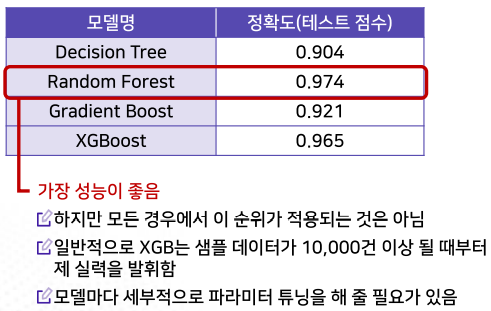

> 파라미터 세부 튜닝: 의사결정 나무 기반 앙상블 모형들은 파라미터를 세부 튜닝하지 않으면 과적합 문제 발생  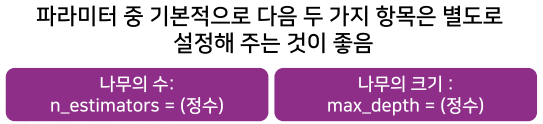

In [ ]:
①②③④⑤⑥⑦⑧⑨⑩